In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [46]:
# Load the Breast Cancer (Diagnostic) Dataset
pd.set_option("display.max.columns", None)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  radius error  texture error  perimeter error  \
0                   0.07871        1.0950         0.9053            8.589   
1                   0.05667        0.5435         0.7339            3.398   
2                   0.05999        0.7456         0.7869            4.585   
3                   0.09744        0.4956         1.1560            3.445   
4                   0.05883        0.7572         0.7813            5.438   
..                      ...           ...            ...              ...   
564                 0.05623        1.1760         1.2560            7.673   
565                 0.05533        0.7655         2.4630            5.203   
566                 0.05648        0.4564         1.0750            3.425   
567                 0.07016        0.7260         1.5950            5.772   
568                 0.05884        0.3857         1.4280            2.548   

     area error  smoothness error  compactness error  concavity error  \
0        153.40          0.006399            0.04904          0.05373   
1         74.08          0.005225            0.01308          0.01860   
2         94.03          0.006150            0.04006          0.03832   
3         27.23          0.009110            0.07458          0.05661   
4         94.44          0.011490            0.02461          0.05688   
..          ...               ...                ...              ...   
564      158.70          0.010300            0.02891          0.05198   
565       99.04          0.005769            0.02423          0.03950   
566       48.55          0.005903            0.03731          0.04730   
567       86.22          0.006522            0.06158          0.07117   
568       19.15          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
3                 0.01867         0.05963                 0.0

In [47]:
cols = df.columns[df.columns != 'target']
df[cols] = StandardScaler.fit_transform(df[cols])
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  radius error  texture error  perimeter error  \
0                  2.255747      2.489734      -0.565265         2.833031   
1                 -0.868652      0.499255      -0.876244         0.263327   
2                 -0.398008      1.228676      -0.780083         0.850928   
3                  4.910919      0.326373      -0.110409         0.286593   
4                 -0.562450      1.270543      -0.790244         1.273189   
..                      ...           ...            ...              ...   
564               -0.931027      2.782080       0.071025         2.379583   
565               -1.058611      1.300499       2.260938         1.156857   
566               -0.895587      0.184892      -0.257371         0.276693   
567                1.043695      1.157935       0.686088         1.438530   
568               -0.561032     -0.070279       0.383092        -0.157449   

     area error  smoothness error  compactness error  concavity error  \
0      2.487578         -0.214002           1.316862         0.724026   
1      0.742402         -0.605351          -0.692926        -0.440780   
2      1.181336         -0.297005           0.814974         0.213076   
3     -0.288378          0.689702           2.744280         0.819518   
4      1.190357          1.483067          -0.048520         0.828471   
..          ...               ...                ...              ...   
564    2.604187          1.086384           0.191805         0.666001   
565    1.291565         -0.424010          -0.069758         0.252202   
566    0.180698         -0.379342           0.661277         0.510827   
567    1.009503         -0.173000           2.017716         1.302285   
568   -0.466152          0.049342          -1.163516        -1.057501   

     concave points error  symmetry error  fractal dimension error  \
0                0.660820        1.148757                 0.907083   
1                0.260162       -0.805450                -0.099444   
2                1.424827        0.237036                 0.293559   
3                1.115007        4.732680                 2.0

In [45]:


#df = StandardScaler.fit_transform(df)
#df = pd.DataFrame(df)
#df.columns = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
#              'mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error',
#              'texture error','perimeter error','area error','smoothness error','compactness error','concavity error',
#              'concave points error','symmetry error','fractal dimension error','worst radius','worst texture',
#              'worst perimeter','worst area','worst smoothness','worst compactness','worst concavity',
#              'worst concave points','worst symmetry','worst fractal dimension']
#df

In [48]:
# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values


In [49]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

In [50]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [51]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

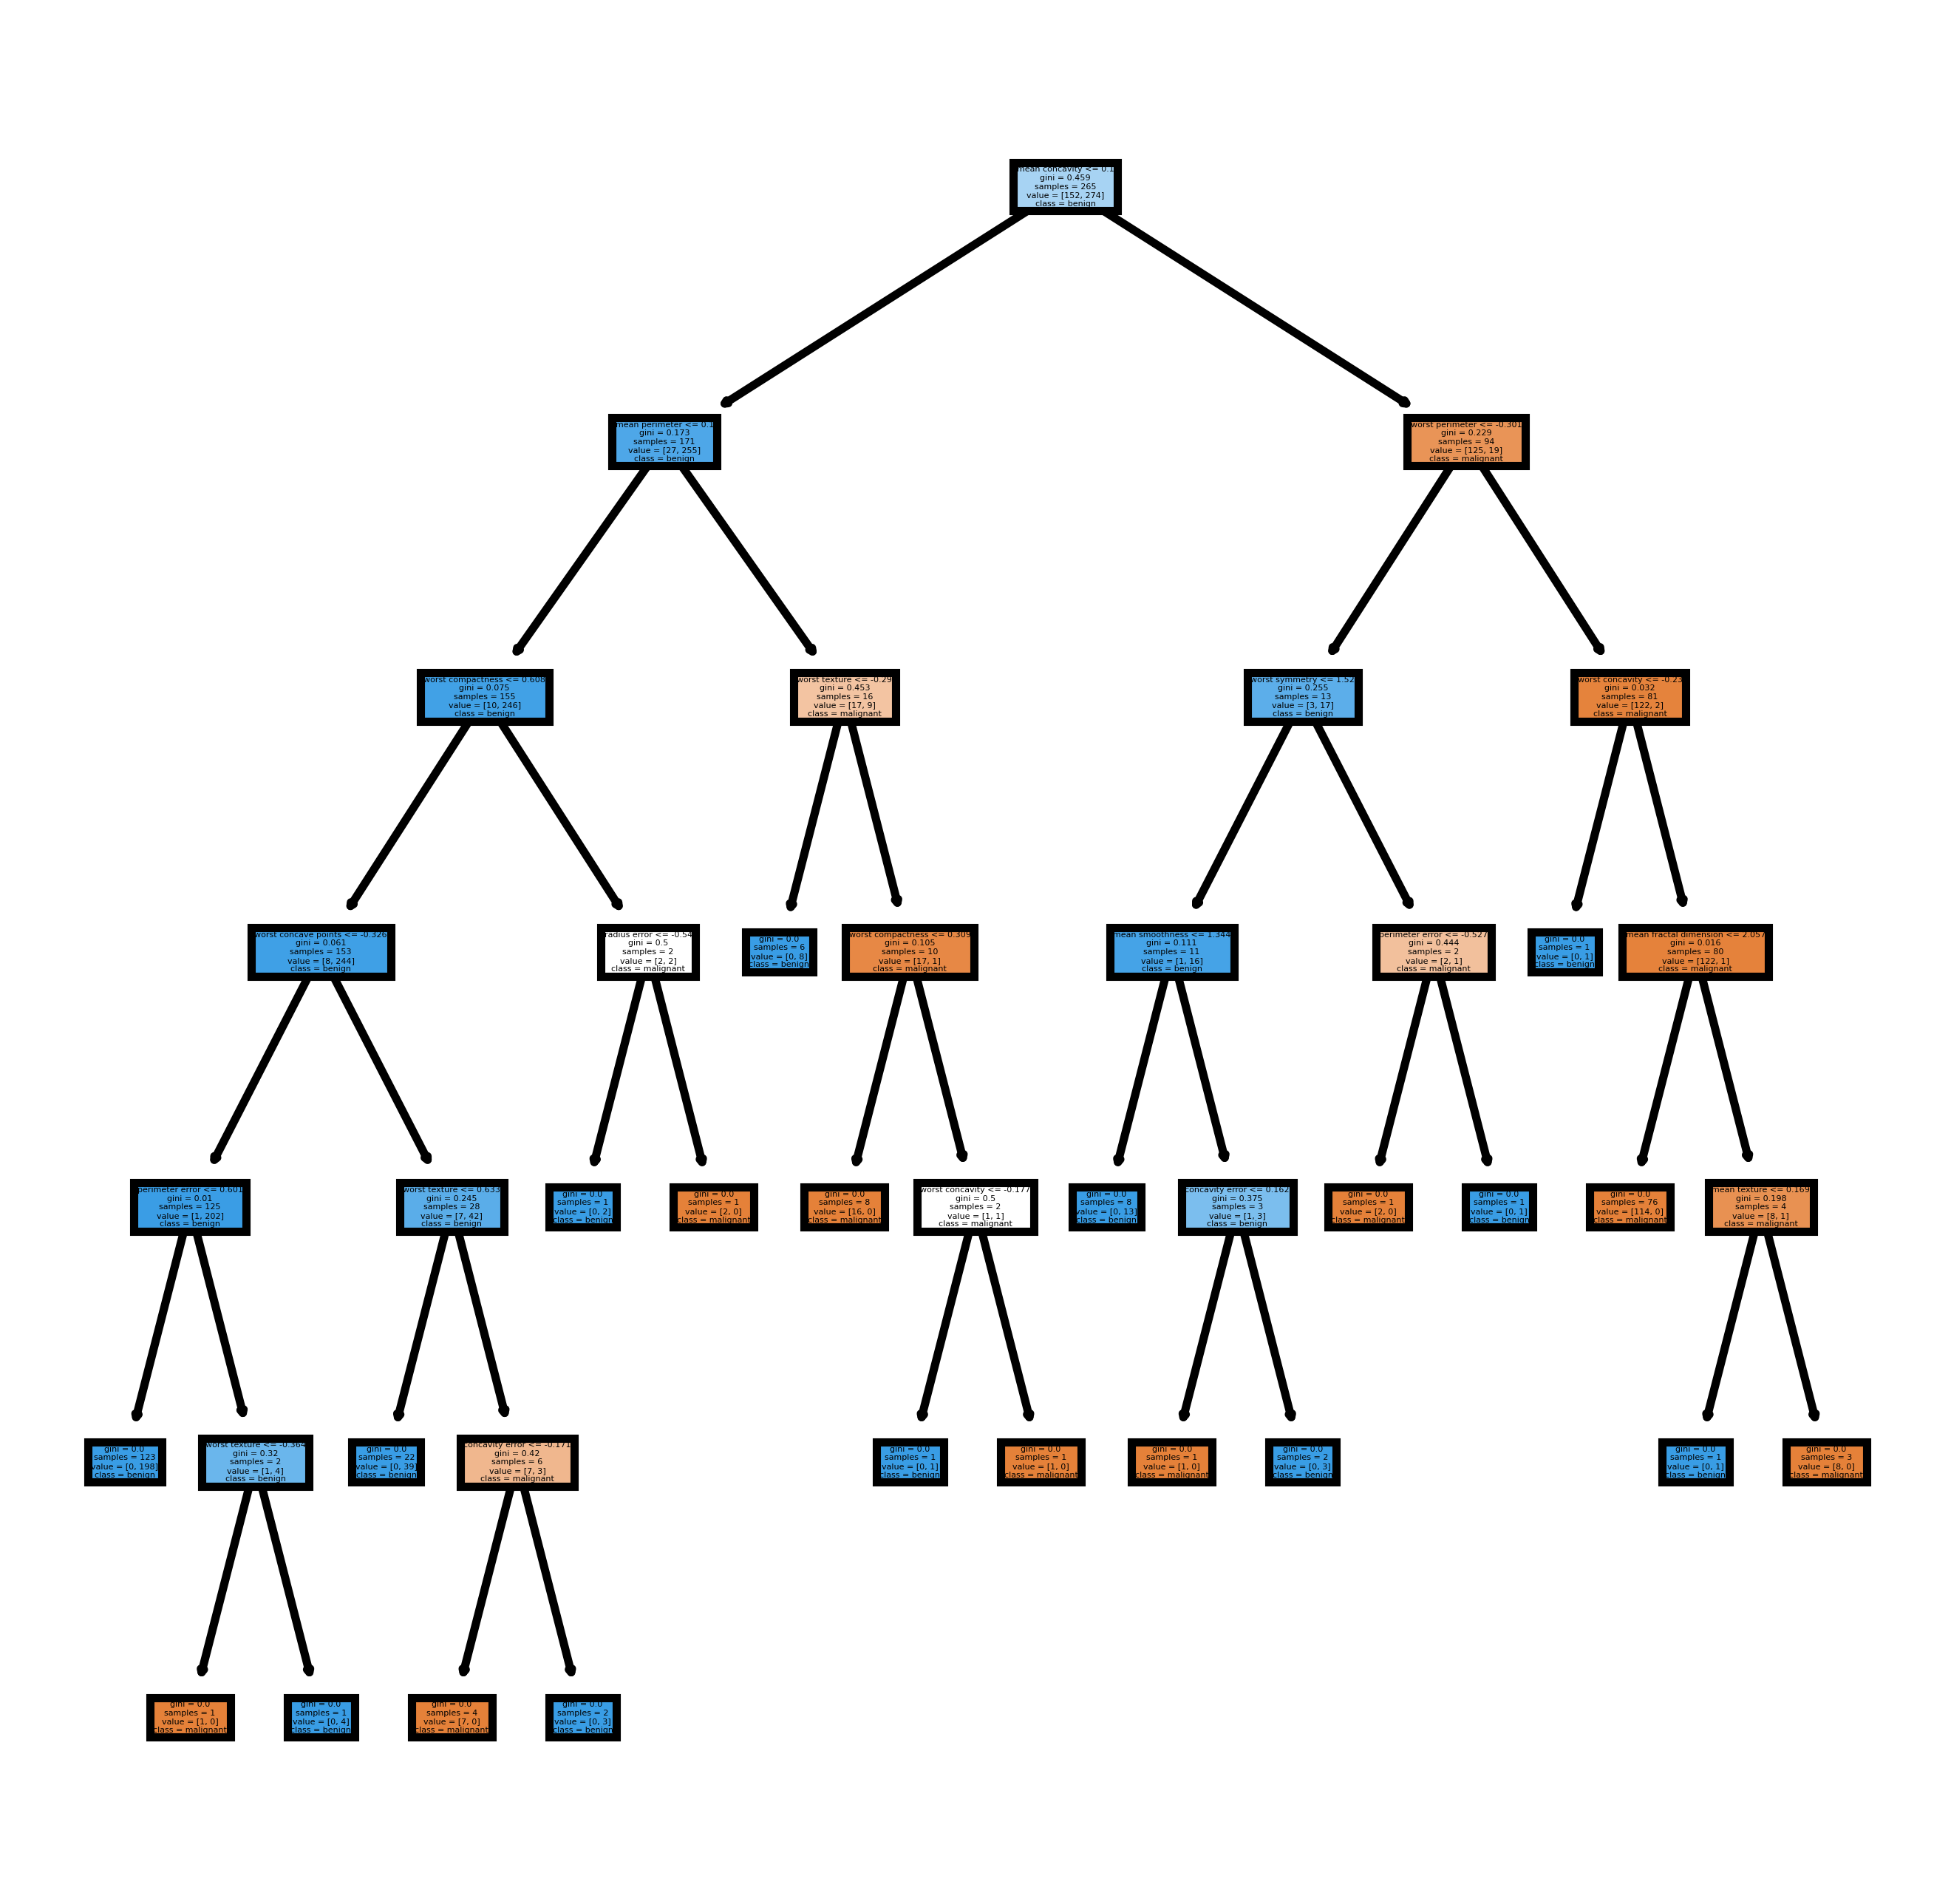

In [52]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [53]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [56]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.08251748251748252
Mean Squared Error: 0.028683916083916076
Root Mean Squared Error: 0.16936326663097898
